In [1]:
# dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pickle5 as pickle

In [3]:
# import my modules
from etl import hrds_test_df
import save_model


In [4]:
# load the model from disk
# drop the categorical values
hrds_test_df = hrds_test_df.drop(['training_buckets','city_index_buckets','experience_buckets'],axis=1)
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
# Making predictions using the testing data.
hrds_test_y = loaded_model.predict(hrds_test_df)

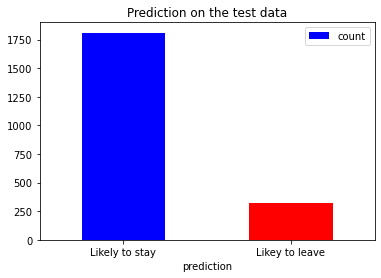

In [5]:
data = {"prediction":np.unique(hrds_test_y),"count":np.unique(hrds_test_y,return_counts = True)[1]}
dataFrame = pd.DataFrame(data=data)
def categorize(x):
    if x == 0:
        return 'Likely to stay'
    else:
        return 'Likey to leave'
dataFrame.prediction = dataFrame.prediction.map(categorize)
# Draw a vertical bar chart
dataFrame.plot.bar(x="prediction", y="count", rot=0, title="Prediction on the test data", color=("blue", "red"))
plt.show(block=True)